Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
  
This project only use white wine dataset

1. Title: Predict Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
  
 
3. Relevant Information:

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 
   
   Our goal is to predict the quality of wine.

4. Number of Instances: white wine - 4898. 

5. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

6. Attribute information:

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

7. Missing Attribute Values: None


In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

#  split using ';'
wine_df = pd.read_csv("winequality-white.csv",sep=';')
display(wine_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
wine_df.shape

(4898, 12)

In [4]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df.duplicated().sum()

937

There are 937 duplicated data, we need to remove duplicate rows

In [8]:
wine_df = wine_df.drop_duplicates()
wine_df.shape

(3961, 12)

## EDA of the dataset

Check the distrubtion of the sample

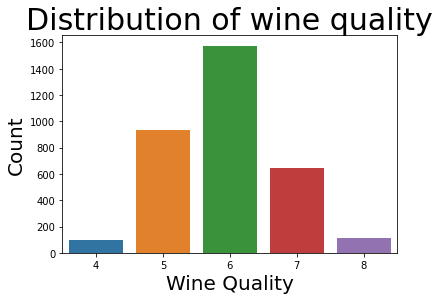

In [47]:
dis = sns.countplot(wine_df['quality'])
dis.axes.set_title('Distribution of wine quality', fontsize = 30)
dis.set_xlabel('Wine Quality', fontsize = 20)
dis.set_ylabel('Count', fontsize = 20)
plt.show()

We can see that there are very few wine are high quality, very few low quality wine

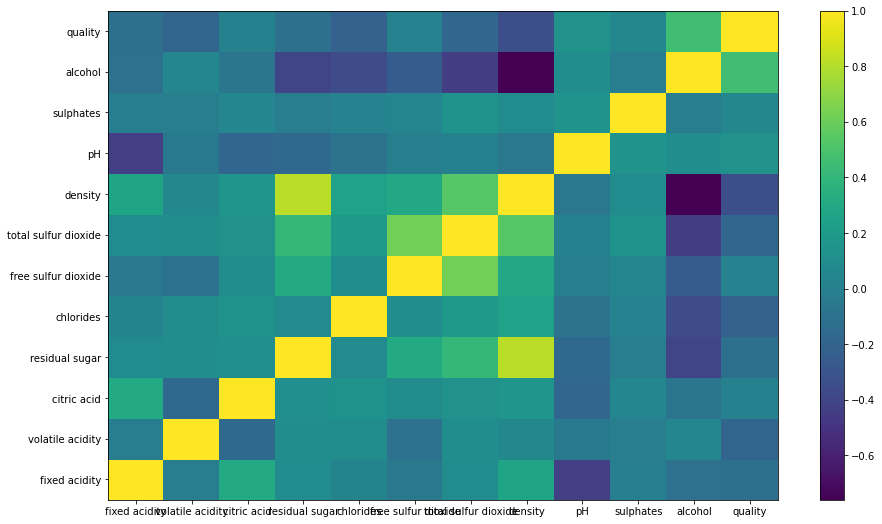

In [80]:
# Plot correlation matrix for columns in wine_df
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 9))
corr = wine_df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

While most of the correlations are weak, we can see that:

The density and residual sugar has the highest corelation with each other.

Alcohol and quality has high corelation with each other.

Total and free sulfur dioxide has strong correlation with each other. 

Alcohol and density has high negative correlation with each other.

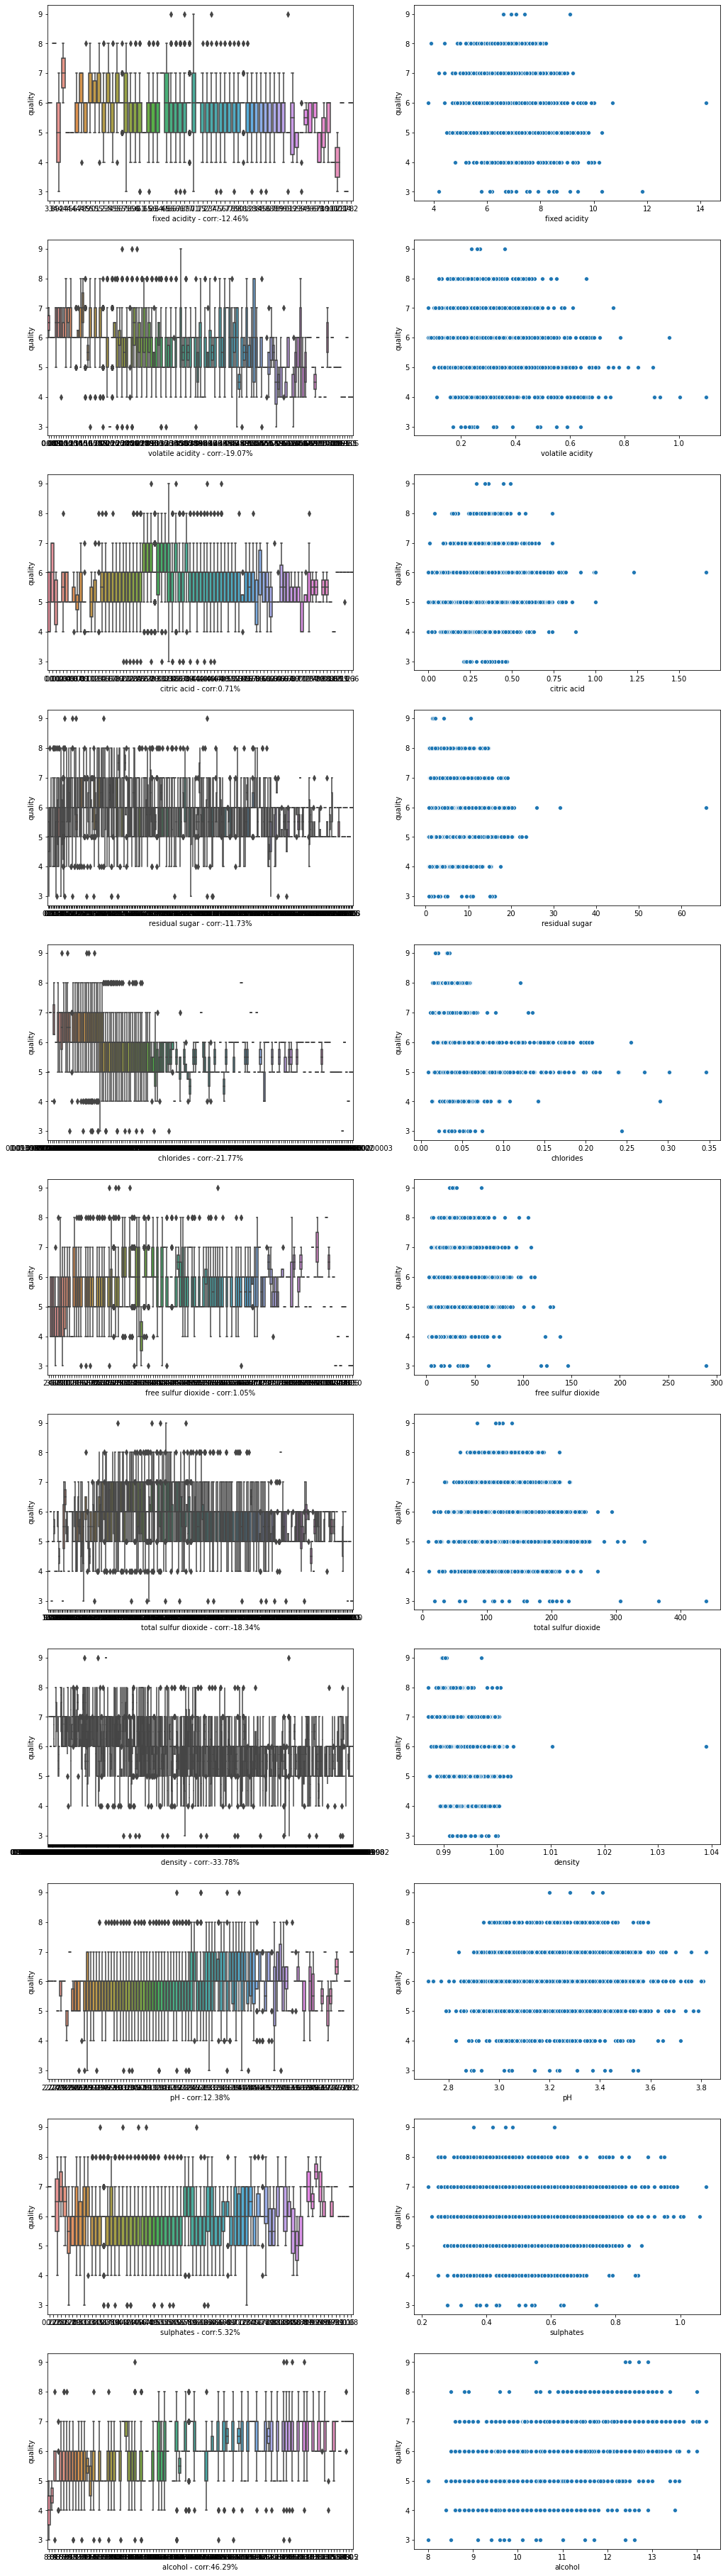

In [45]:
import numpy as np
import seaborn as sns

def corr_anlyze(df, target='quality'):
    cols = list(df.columns)
    cols.remove(target)
    corr_df = pd.DataFrame(columns=cols)
#     f, axes = plt.subplots(len(cols), 2, figsize=(17,6*len(cols)))
#     for i,col in enumerate(cols):
#         sns.boxplot(x=col, y=target, data = df , ax=axes[i][0])
#         corr = df[col].corr(df[target])
#         corr_df.loc['corr',col] = corr
#         axes[i][0].set_xlabel(f'{col} - corr:{corr:.2%}')
#         sns.scatterplot(x=col, y=target, data = df ,  ax=axes[i][1])
    return corr_df

corr_df = corr_anlyze(wine_df)

We can see there are no obviously correlation with quality

In [46]:
corr_df = corr_df.transpose()
corr_df['abs_corr'] = corr_df['corr'].abs()
corr_df = corr_df.sort_values('abs_corr',ascending=False)
display(corr_df)

,corr,abs_corr
alcohol,0.462869,0.462869
density,-0.337805,0.337805
chlorides,-0.217739,0.217739
volatile acidity,-0.190678,0.190678
total sulfur dioxide,-0.183356,0.183356
fixed acidity,-0.124636,0.124636
pH,0.123829,0.123829
residual sugar,-0.117339,0.117339
sulphates,0.0532004,0.0532004
free sulfur dioxide,0.0105067,0.0105067


We can see the corr of each features with quality, alcohol has the strongest positive correaltion with quality,  we will plot some features that has high correlation with quality.

Let's see the correlation of alcohol with quality

Text(0, 0.5, 'Wine Alcohol %')

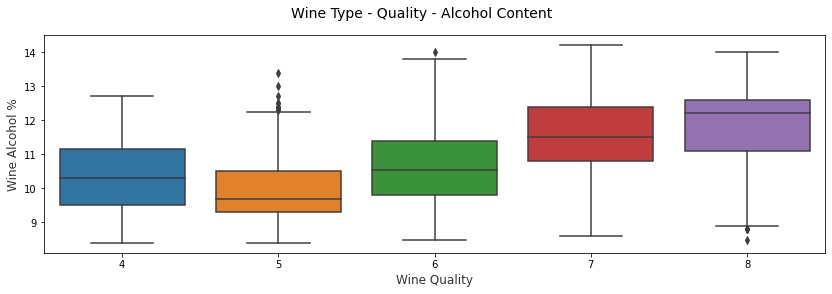

In [35]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol', data=wine_df, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

 We can clearly observe the wine alcohol by volume distribution has an increasing trend based on higher quality rated wine samples, and some outliers in each quality level often depicted by individual points

Text(0, 0.5, 'density')

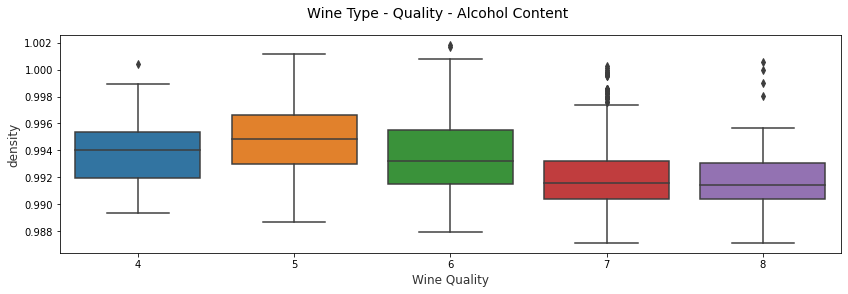

In [36]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='density', data=wine_df, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("density",size = 12,alpha=0.8)

There are some outliers which are the point outside of the box.  the density has no much obviously correlation with quality. remove the outlier

Let's see the PH and fix acidity

Text(0, 0.5, 'fixed acidity')

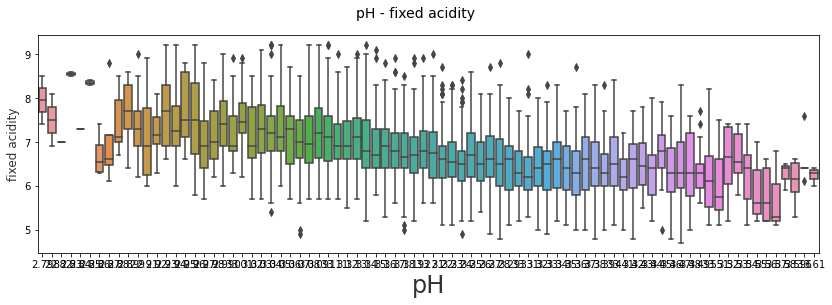

In [37]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 4))
f.suptitle('pH - fixed acidity', fontsize=14)

sns.boxplot(x='pH', y='fixed acidity', data=wine_df, ax=ax1)
ax1.set_xlabel("pH",size = 24,alpha=0.8)
ax1.set_ylabel("fixed acidity",size = 12,alpha=0.8)

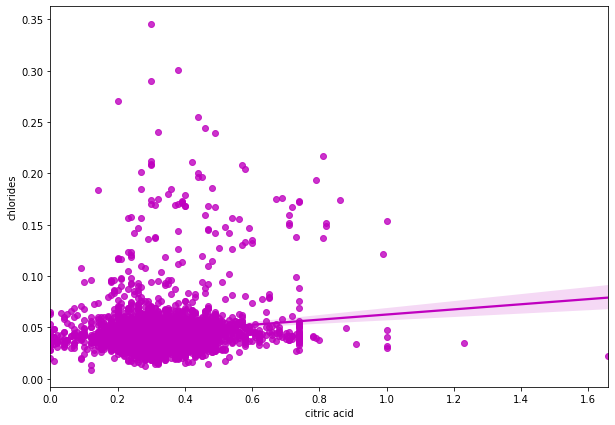

In [26]:
plt.figure(figsize=(10,7))
sns.regplot(x="citric acid",y="chlorides",data =wine_df,marker= 'o',color="m")
plt.show()

From all above, we can see there are many outlier in each column.

After detecting the outlier we should remove\treat the outlier because it is a silent killer!! yes.
* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. There are some techniques used to deal with outliers.

In [34]:
#remove all outliers
for col in wine_df.columns:
    lower_limit = wine_df[col].mean() - 3*wine_df[col].std()
    upper_limit = wine_df[col].mean() + 3*wine_df[col].std()
    wine_df = wine_df.loc[(wine_df[col]>=lower_limit) & (wine_df[col]<= upper_limit) ]
    
wine_df.shape

(3363, 12)

## Building model

Select features and label

In [38]:
X_features = wine_df.drop('quality',axis = 1)
Y = wine_df['quality']

As it has many features, some are don't have much correalation with quality, so we use PCA to reduce features

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(X_features)
X = pca.transform(X_features)

#X = wine_df.drop('quality',axis = 1)

In [116]:
X

array([[-8.45332392e+00,  1.90040359e+01, -2.81193485e+00, ...,
        -1.60612644e-02,  3.54212560e-02,  5.05398840e-02],
       [-3.83495058e+01, -5.15225245e+00,  2.78126470e+00, ...,
        -5.61045421e-02,  2.58010318e-02,  7.39174123e-02],
       [ 5.21049633e+01, -3.50981832e-01,  1.92650844e-01, ...,
        -1.01414982e-01,  1.52311899e-02, -4.91821896e-02],
       ...,
       [-2.50346481e+01, -1.52903033e+00, -3.35159148e+00, ...,
         9.86821818e-04, -1.06513815e-01, -4.62022445e-02],
       [-2.84336214e+01,  7.90330542e+00, -3.13518337e+00, ...,
        -1.01245559e-01,  5.03262534e-02, -4.87453882e-04],
       [-3.95989284e+01,  3.10734290e+00, -3.02609575e+00, ...,
        -1.25230955e-01,  1.40501832e-01, -2.29787921e-02]])

Split the dataset to train and test dataset

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.2)
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((2690, 9), (2690,), (673, 9), (673,))

Building model using logisticRegression

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train.values.ravel())

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
#predict and calculate the accuracy
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
y_trainpredict = model.predict(X_train)
print('accuracy_score on test is %f'% accuracy_score(y_test,y_predict))
print('accuracy_score on train is %f'% accuracy_score(y_train,y_trainpredict))

accuracy_score on test is 0.502229
accuracy_score on train is 0.517472


We can see that the accuracy_score on train and test dataset are not goode,  it shows logistregression and PCA are not fit for this dataset

In [120]:
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_predit})
accuracy_dataframe

,y_test,y_pred
4142,6,6
2663,8,6
1009,6,6
2459,5,5
2479,6,5
...,...,...
1679,5,6
200,5,6
4226,7,6
4495,6,6
